In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stanford-dogs-dataset/annotations/Annotation/n02091635-otterhound/n02091635_1634
/kaggle/input/stanford-dogs-dataset/annotations/Annotation/n02091635-otterhound/n02091635_4626
/kaggle/input/stanford-dogs-dataset/annotations/Annotation/n02091635-otterhound/n02091635_3916
/kaggle/input/stanford-dogs-dataset/annotations/Annotation/n02091635-otterhound/n02091635_386
/kaggle/input/stanford-dogs-dataset/annotations/Annotation/n02091635-otterhound/n02091635_3521
/kaggle/input/stanford-dogs-dataset/annotations/Annotation/n02091635-otterhound/n02091635_390
/kaggle/input/stanford-dogs-dataset/annotations/Annotation/n02091635-otterhound/n02091635_3072
/kaggle/input/stanford-dogs-dataset/annotations/Annotation/n02091635-otterhound/n02091635_4377
/kaggle/input/stanford-dogs-dataset/annotations/Annotation/n02091635-otterhound/n02091635_3822
/kaggle/input/stanford-dogs-dataset/annotations/Annotation/n02091635-otterhound/n02091635_2287
/kaggle/input/stanford-dogs-dataset/annotations/Anno

In [2]:
import pandas as pd;

In [3]:
import tensorflow as tf

In [4]:
import os
dsdir=os.path.join('../input/stanford-dogs-dataset/images/Images')

In [5]:
dsdir

'../input/stanford-dogs-dataset/images/Images'

In [6]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
batch_size=32
image_size=(200,200)

In [7]:
#ds= image_dataset_from_directory(dsdir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dsdir,
    validation_split=0.2,
    subset="training",
    label_mode = 'int',
    seed = 1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dsdir,
    validation_split=0.2,
    subset="validation",
    label_mode = 'int',
    seed =1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.
Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [9]:
#import numpy as np

In [10]:
#classes= ds.class_names

In [11]:
#import PIL
#import os
#import pathlib

In [12]:
#import matplotlib.pyplot as plt

#plt.figure(figsize=(10, 10))
#for images, labels in ds.take(1):     
#    for i in range(20):
#        pic = plt.subplot(4, 5, i + 1)
#        plt.imshow(images[i].numpy().astype("uint8"))
#        class_name = ds.class_names[labels[i].numpy()]
#        class_name = class_name.split('/')[0]
#        class_name = class_name.split('-')[1:]
#        class_name = '-'.join(class_name)
#        plt.title(class_name)
#        plt.axis("off")

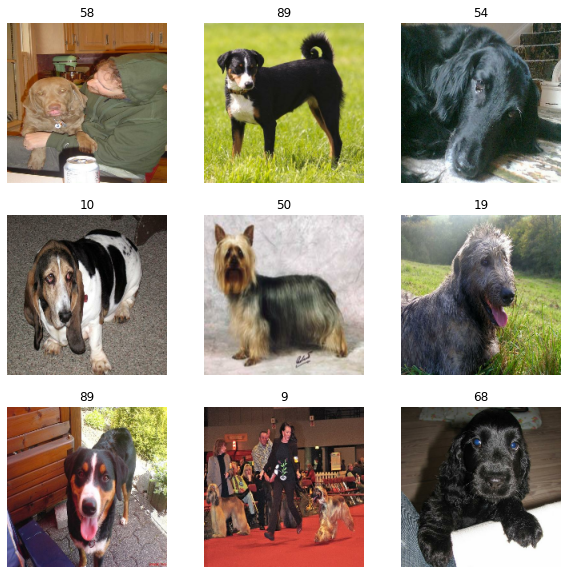

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [14]:
#AUGMENTATION BELOW

In [15]:
data_augmentation_train = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.Rescaling(scale =1./255),
        tf.keras.layers.experimental.preprocessing.RandomHeight(0.1),
        tf.keras.layers.experimental.preprocessing.RandomWidth(0.1)
    ]
)

In [16]:
data_augmentation_test = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.Rescaling(scale =1./255)
    ]
)

In [17]:
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation_train(x, training=True), y))

augmented_val_ds = val_ds.map(
  lambda x, y: (data_augmentation_test(x, training=True), y))

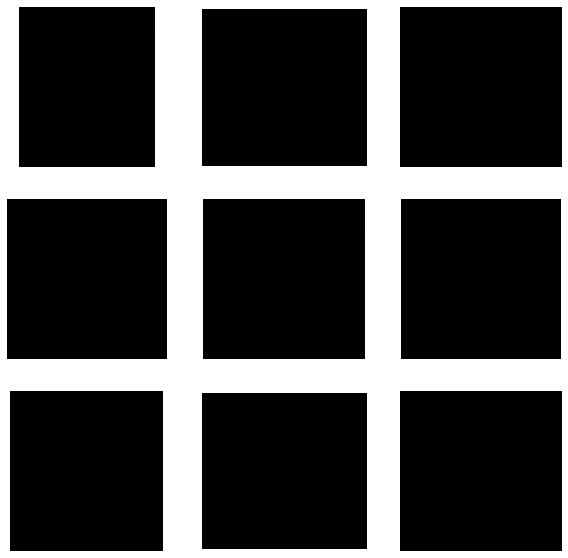

In [18]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation_train(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [19]:
#CREATING MODEL AND COMPILING

In [20]:
#Inception V3 

from tensorflow.keras.applications.inception_v3 import InceptionV3
pre_trained_model = InceptionV3(input_shape=(200,200,3),
                                               include_top=False,
                                               weights='imagenet')
for layer in pre_trained_model.layers:
  layer.trainable = False
pre_trained_model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 99, 99, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 99, 99, 32)   0           batch_normalization[0][0]        
______________________

In [21]:
g_a_layer=tf.keras.layers.GlobalAveragePooling2D()
#dense1=tf.keras.layers.Dense(40)
droplayer=tf.keras.layers.Dropout(rate=0.2)
pred_layer = tf.keras.layers.Dense(120, activation="softmax")

In [22]:
model= tf.keras.Sequential(
[
    pre_trained_model,
    g_a_layer,
    droplayer,
    pred_layer
])

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 4, 4, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               245880    
Total params: 22,048,664
Trainable params: 245,880
Non-trainable params: 21,802,784
_________________________________________________________________


In [25]:
# Callbacks

lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=2, mode='max')
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')

In [26]:
hist = model.fit(
           augmented_train_ds.repeat(), steps_per_epoch=int(8000/batch_size), 
           epochs=30, validation_data=augmented_val_ds.repeat(), 
           validation_steps=int(2000/batch_size) , callbacks=[lr_reduce])

Epoch 1/30
250/250 [==============================] - 466s 2s/step - loss: 2.2320 - accuracy: 0.4952 - val_loss: 1.1616 - val_accuracy: 0.6996
Epoch 2/30
250/250 [==============================] - 448s 2s/step - loss: 1.6876 - accuracy: 0.6075 - val_loss: 1.1446 - val_accuracy: 0.7137
Epoch 3/30
250/250 [==============================] - 409s 2s/step - loss: 1.4895 - accuracy: 0.6467 - val_loss: 1.1179 - val_accuracy: 0.7233
Epoch 4/30
250/250 [==============================] - ETA: 0s - loss: 1.5565 - accuracy: 0.6426
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
250/250 [==============================] - 402s 2s/step - loss: 1.5565 - accuracy: 0.6426 - val_loss: 1.1580 - val_accuracy: 0.7268
Epoch 5/30
250/250 [==============================] - 397s 2s/step - loss: 1.1195 - accuracy: 0.7067 - val_loss: 0.9056 - val_accuracy: 0.7611
Epoch 6/30
250/250 [==============================] - 406s 2s/step - loss: 1.0422 - accuracy: 0.7218 - val_loss: 0.9246

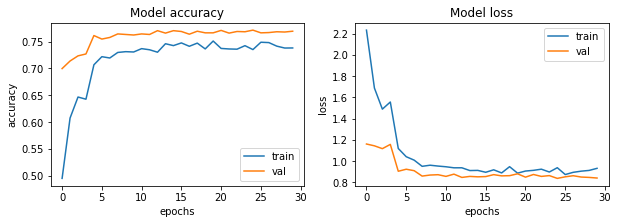

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(hist.history[met])
    ax[i].plot(hist.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [28]:
#FINISHED

In [29]:
#TESTING

In [30]:
for imgs,lbls in val_ds.take(1):
    ans=model.predict(imgs)

In [31]:
#DONE

In [32]:
#batches = tf.data.experimental.cardinality(ds)

In [33]:
#train_ds=ds

In [34]:
#val_ds=ds.take(batches//5)
#test_ds=ds.take(batches//10)
#train_ds=ds.skip(batches//(10//3))

In [35]:
#print('Number of train batches: %d' % tf.data.experimental.cardinality(train_ds))
#print('Number of val batches: %d' % tf.data.experimental.cardinality(val_ds))
#print('Number of test batches: %d' % tf.data.experimental.cardinality(test_ds))

In [36]:
#for image, _ in train_ds.take(1):
#    plt.figure(figsize=(10, 10))
#    first_image = image[0]
#    for i in range(1):
#        ax = plt.subplot(1, 1, i + 1)
#        plt.imshow(first_image/255)
#        plt.axis('off')

In [37]:
#import tensorflow as tf
#data_augment= tf.keras.Sequential([
#    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
#   tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
#])

In [38]:
#rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
#rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [39]:
#from keras.applications.imagenet_utils import preprocess_input
#preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [40]:
#IMG_SHAPE = IMG_SIZE + (3,)
#base_model = tf.keras.applications.EfficientNetB3(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')

In [41]:
#base_model.trainable = False

In [42]:
#g_a_layer=tf.keras.layers.GlobalAveragePooling2D()
#dense1=tf.keras.layers.Dense(40)
#pred_layer = tf.keras.layers.Dense(120, activation="softmax")

In [43]:
#img,lab=next(iter(train_ds))
#feature_batch = base_model(img)
#fb_avg=g_a_layer(feature_batch)
#layer_d=dense1(fb_avg)
#pr=pred_layer(fb_avg)
#layer_d.shape

In [44]:
#pr.shape[0]

In [45]:
#pr[0].numpy().argmax()

In [46]:
#for i in range(pr.shape[0]):
#    a.append(pr[i].numpy().argmax())

In [47]:
#len(a)
#arr=np.array(a)
#arr.shape

In [48]:
#inputs = tf.keras.Input(shape=(240, 240, 3))
#x = data_augment(inputs)
#x = base_model(x, training=False)
#x = g_a_layer(x)
#x = tf.keras.layers.Dropout(0.3)(x)
#x = dense1(x)
#out = pred_layer(x)
#lis=[]
#lis.append(tf.math.argmax(tf.math.argmax(out)))
#outarr=np.array(lis)

#outputs=tf.convert_to_tensor(lis)

#model = tf.keras.Model(inputs, outputs)

In [49]:
#base_learning_rate = 0.0001
#model.compile(optimizer=tf.keras.optimizers.Adam(),
#              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
#              metrics=['accuracy'])

In [50]:
#model.summary()

In [51]:
#initial_epochs = 1

In [52]:
#i,l=next(iter(train_ds))

In [53]:
#pre=model.predict(i)

In [54]:
#pre[3].argmax()

In [55]:
#l.numpy().shape

In [56]:
#pre

In [57]:
#history = model.fit(val_ds,
#                    epochs=initial_epochs,
#                    validation_data=test_ds)

In [58]:
#loss0, accuracy0 = model.evaluate(val_ds)